## Bringing in the Data

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Read School and Student Data File and store into Pandas DataFrames
provider_data = pd.read_csv("NH_ProviderInfo_Jun2023.csv")

provider_data.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,31.333,2,0,0.0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",6/1/2023
1,15010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,6.667,0,0,0.0,1,650.00,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",6/1/2023
2,15012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,13.333,0,0,0.0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",6/1/2023
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",6/1/2023
4,15015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,32.000,0,1,0.0,2,1625.00,0,2,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",6/1/2023


In [2]:
#provider_data.columns

In [3]:
oklahoma_data = provider_data[provider_data["State"] == "OK"]
oklahoma_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,9186280932,710,Tulsa,For profit - Limited Liability company,...,129.500,0,9,8.0,22,207430.15,1,23,"2425 SOUTH MEMORIAL,TULSA,OK,74129",6/1/2023
10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110,4057376601,540,Oklahoma,For profit - Corporation,...,49.333,0,3,8.0,1,5000.00,0,1,"2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110",6/1/2023
10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,73750,4053756857,360,Kingfisher,For profit - Corporation,...,131.667,1,13,7.0,11,143315.27,1,12,"905 BEALL ROAD,KINGFISHER,OK,73750",6/1/2023
10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139,4056360626,540,Oklahoma,For profit - Partnership,...,29.333,0,8,3.0,1,655.01,0,1,"940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139",6/1/2023
10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,73008,4057897242,540,Oklahoma,For profit - Partnership,...,48.667,0,11,12.0,1,655.01,0,1,"7000 NORTHWEST 32ND STREET,BETHANY,OK,73008",6/1/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,3.70E+110,COLONIAL MANOR II,120 WEST VERSA,HOLLIS,OK,73550,5806882828,280,Harmon,Government - County,...,40.000,0,1,0.0,1,20780.00,1,2,"120 WEST VERSA,HOLLIS,OK,73550",6/1/2023
10701,3.70E+205,RAINBOW TERRACE CARE CENTER,300 WEST 9TH STREET,WELEETKA,OK,74880,4057862244,530,Okfuskee,For profit - Corporation,...,157.167,0,6,7.0,7,26699.40,1,8,"300 WEST 9TH STREET,WELEETKA,OK,74880",6/1/2023
10702,37E568,NORTH WINDS LIVING CENTER,3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112,4059421014,540,Oklahoma,For profit - Corporation,...,18.000,0,1,0.0,3,2925.00,1,4,"3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112",6/1/2023
10703,37E624,CALLAWAY NURSING HOME,1300 WEST LINDSEY,SULPHUR,OK,73086,5806222416,490,Murray,For profit - Corporation,...,64.667,0,4,1.0,50,223481.70,2,52,"1300 WEST LINDSEY,SULPHUR,OK,73086",6/1/2023


## Cleaning the Data

In [4]:
# Tested for duplicate rows avvording to 'Provider Name' and 'Provider Address'. There are no duplicates. 
duplicate_names = oklahoma_data[oklahoma_data.duplicated(['Provider Name'])]
duplicate_address = oklahoma_data[oklahoma_data.duplicated(['Provider Address'])]

In [5]:
# Removing columns we will not be using from the data to make it more managable. 
ok_reduced_with_null_data = oklahoma_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'Staffing Rating', 
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines', 'Total Amount of Fines in Dollars',
        'Total Number of Penalties']]
ok_reduced_data = ok_reduced_with_null_data.dropna()
ok_reduced_data = ok_reduced_data.reset_index()
ok_reduced_data

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,For profit - Corporation,4.0,3.0,5.0,5.0,4.0,3.0,0.45934,66.2,1,5000.00,1
2,10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,For profit - Corporation,1.0,1.0,3.0,4.0,2.0,3.0,0.36072,50.0,11,143315.27,12
3,10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,For profit - Partnership,4.0,4.0,4.0,4.0,3.0,3.0,0.42126,60.6,1,655.01,1
4,10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,For profit - Partnership,3.0,3.0,3.0,4.0,2.0,2.0,0.44678,66.7,1,655.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,10678,375561,ST. ANN'S SKILLED NURSING AND THERAPY,9400 ST ANN'S DRIVE,OKLAHOMA CITY,OK,For profit - Partnership,3.0,3.0,4.0,5.0,3.0,2.0,0.26693,64.4,1,655.01,1
138,10679,375562,MCMAHON-TOMLINSON NURSING CENTER,2007 NW 52ND STREET,LAWTON,OK,Government - County,1.0,2.0,2.0,2.0,2.0,1.0,0.25939,68.0,2,10087.94,2
139,10683,375566,ELK CROSSING,811 WEST ELK,DUNCAN,OK,For profit - Partnership,5.0,5.0,3.0,3.0,4.0,3.0,0.16578,52.6,1,657.80,1
140,10690,375574,THE LODGE AT BROOKLINE,5301 NORTH BROOKLINE,OKLAHOMA CITY,OK,For profit - Individual,2.0,2.0,4.0,5.0,3.0,4.0,0.43167,35.9,1,3250.00,1


In [6]:
tulsa_data = ok_reduced_data[ok_reduced_data["City/Town"] == "TULSA"]
tulsa_data = tulsa_data.reset_index()[['CMS Certification Number (CCN)', 'Provider Name',
       'Provider Address', 'City/Town', 'State', 'Ownership Type',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Long-Stay QM Rating', 'Short-Stay QM Rating', 'Staffing Rating',
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]
tulsa_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,375168,AMBASSADOR MANOR NURSING CENTER,1340 EAST 61ST STREET,TULSA,OK,For profit - Partnership,2.0,2.0,2.0,4.0,1.0,2.0,0.33464,60.0,1,655.01,1
2,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,For profit - Corporation,2.0,2.0,2.0,2.0,2.0,2.0,0.30572,74.0,22,83494.15,23
3,375230,LEISURE VILLAGE HEALTH CARE CENTER,2154 SOUTH 85TH EAST AVENUE,TULSA,OK,For profit - Partnership,2.0,2.0,3.0,3.0,2.0,2.0,0.35752,73.4,3,11738.20,3
4,375389,TULSA NURSING CENTER,10912 EAST 14TH STREET,TULSA,OK,For profit - Limited Liability company,3.0,2.0,5.0,5.0,3.0,3.0,0.49927,78.6,1,655.14,2
5,375454,"TRINITY WOODS, INC.",4134 EAST 31ST STREET,TULSA,OK,Non profit - Church related,3.0,3.0,4.0,3.0,5.0,4.0,0.33622,52.1,1,650.00,1
6,375460,"MONTEREAU, INC",6800 SOUTH GRANITE AVENUE,TULSA,OK,Non profit - Corporation,5.0,5.0,4.0,3.0,4.0,4.0,0.51174,66.7,1,650.00,1
7,375476,COVENANT LIVING AT INVERNESS,3800 WEST 71ST STREET SOUTH,TULSA,OK,Non profit - Corporation,4.0,4.0,4.0,3.0,4.0,4.0,0.59124,68.8,0,0.00,0
8,375489,THE COTTAGE EXTENDED CARE,7707 SOUTH MEMORIAL DRIVE,TULSA,OK,For profit - Individual,3.0,3.0,4.0,4.0,3.0,3.0,0.30348,70.3,6,8865.48,6
9,375531,UNIVERSITY VILLAGE RETIREMENT COMMUNITY,8555 SOUTH LEWIS AVENUE,TULSA,OK,For profit - Corporation,3.0,3.0,2.0,1.0,2.0,4.0,0.54460,71.9,1,18547.75,1


## Total Fines Analysis

### Average Fines VS QM Rating

C:\Users\morga\AppData\Local\Temp\ipykernel_20808\1086532651.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_value_rating = ok_reduced_data.groupby(['QM Rating']).mean()['Number of Fines']


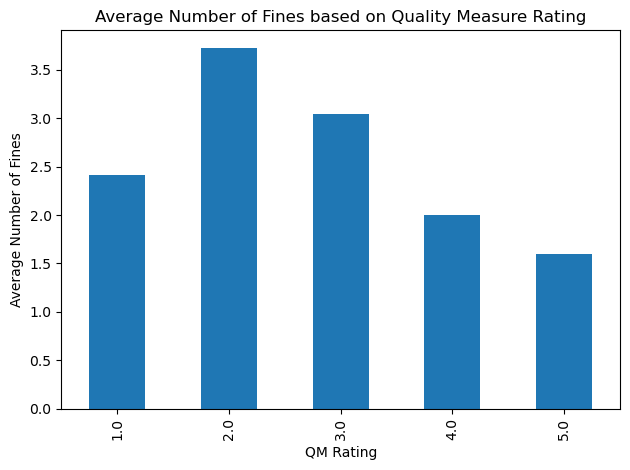

In [113]:
x_value_rating = ok_reduced_data.groupby(['QM Rating']).mean()['Number of Fines']
x_value_rating.plot.bar(ylabel='Average Number of Fines', title='Average Number of Fines based on Quality Measure Rating')
plt.tight_layout()
plt.savefig('bar_avg_fines_vs_QM.png')

### Total Fines VS Staffed Nursing Hours

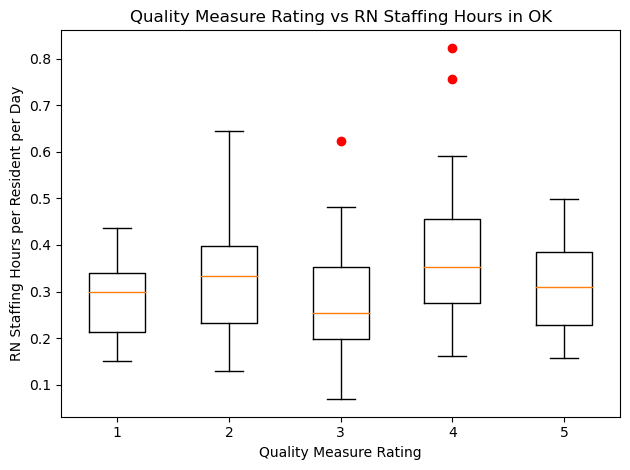

In [114]:
box_data1 = ok_reduced_data[ok_reduced_data['QM Rating']==1]['Reported RN Staffing Hours per Resident per Day']
box_data2 = ok_reduced_data[ok_reduced_data['QM Rating']==2]['Reported RN Staffing Hours per Resident per Day']
box_data3 = ok_reduced_data[ok_reduced_data['QM Rating']==3]['Reported RN Staffing Hours per Resident per Day']
box_data4 = ok_reduced_data[ok_reduced_data['QM Rating']==4]['Reported RN Staffing Hours per Resident per Day']
box_data5 = ok_reduced_data[ok_reduced_data['QM Rating']==5]['Reported RN Staffing Hours per Resident per Day']

box_data = [box_data1, box_data2, box_data3, box_data4, box_data5]

plt.boxplot(box_data, sym='ro')
plt.ylabel('RN Staffing Hours per Resident per Day')
plt.xlabel('Quality Measure Rating')
plt.title('Quality Measure Rating vs RN Staffing Hours in OK')
plt.tight_layout()


In [115]:
#Binning based on the number of fines. 
fine_bins = [-.01,3,6,10,19,29, 35]
labels = ["0-3 fines","4-6 fines", "7-10 fines", "11-19 fines", "20-29 fines", "30+ fines"]

grouped_fines = pd.cut(ok_reduced_data['Number of Fines'], bins=fine_bins, labels=labels)

ok_reduced_data['Fine Categories'] = grouped_fines
ok_data_fines = ok_reduced_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Number of Fines','Fine Categories',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]

C:\Users\morga\AppData\Local\Temp\ipykernel_20808\1680818407.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_val_fine = ok_reduced_data.groupby(['Fine Categories']).mean()['Reported RN Staffing Hours per Resident per Day']


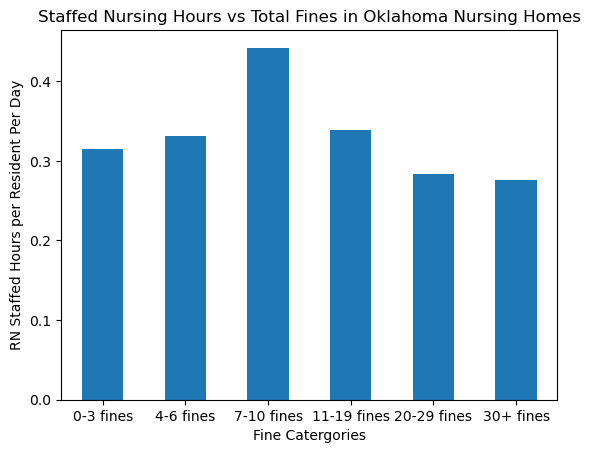

In [116]:
x_val_fine = ok_reduced_data.groupby(['Fine Categories']).mean()['Reported RN Staffing Hours per Resident per Day']
x_val_fine.plot(kind = "bar", xlabel='Fine Catergories', ylabel='RN Staffed Hours per Resident Per Day', title='Staffed Nursing Hours vs Total Fines in Oklahoma Nursing Homes', rot=0)
plt.savefig('bar_nurse_hours_vs_total_fines.png')

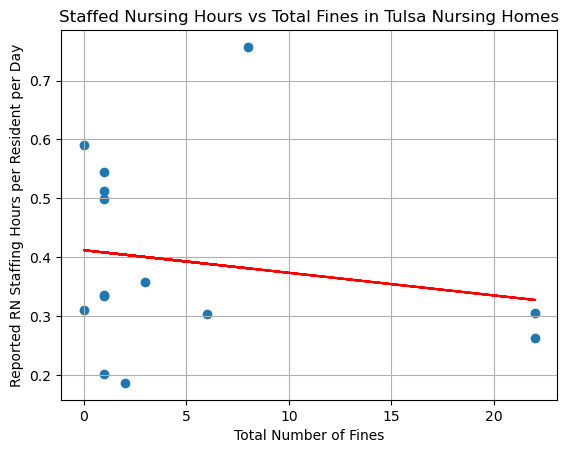

In [117]:
x_val = tulsa_data['Number of Fines']
y_val = tulsa_data['Reported RN Staffing Hours per Resident per Day']

cor_coefficent, p_value = st.pearsonr(x_val, y_val)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
plt.plot(x_val, (slope*x_val + intercept), color="red")
plt.scatter(x_val, y_val)
plt.ylabel('Reported RN Staffing Hours per Resident per Day')
plt.xlabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Tulsa Nursing Homes')
plt.grid()
plt.savefig('scatter_nurse_hours_vs_fines.png')

# print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression. The p-value of linear trend is {round(p_value,2)}, therefor we can confidently say there is no trend.")

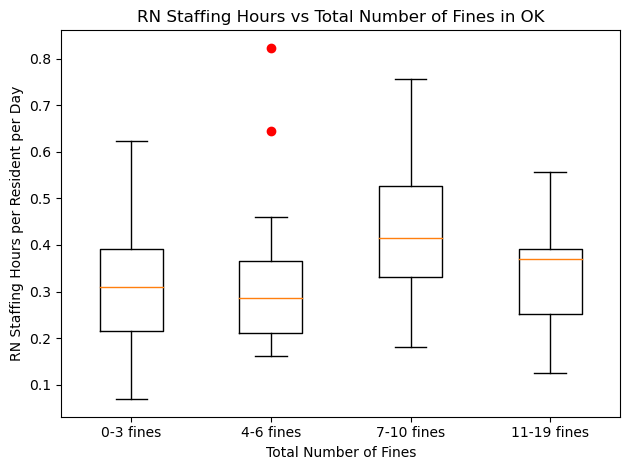

In [118]:
box_data1 = ok_reduced_data[ok_reduced_data['Fine Categories']=='0-3 fines']['Reported RN Staffing Hours per Resident per Day']
box_data2 = ok_reduced_data[ok_reduced_data['Fine Categories']=='4-6 fines']['Reported RN Staffing Hours per Resident per Day']
box_data3 = ok_reduced_data[ok_reduced_data['Fine Categories']=='7-10 fines']['Reported RN Staffing Hours per Resident per Day']
box_data4 = ok_reduced_data[ok_reduced_data['Fine Categories']=='11-19 fines']['Reported RN Staffing Hours per Resident per Day']
OK_labels = ["0-3 fines","4-6 fines", "7-10 fines", "11-19 fines"]

box_data = [box_data1, box_data2, box_data3, box_data4]

plt.boxplot(box_data, sym='ro')
plt.ylabel('RN Staffing Hours per Resident per Day')
plt.xlabel('Total Number of Fines')
plt.xticks([1,2,3,4], labels=OK_labels)
plt.title('RN Staffing Hours vs Total Number of Fines in OK')
plt.tight_layout()
plt.savefig('whisker_nurse_hours_vs_fines.png')

### Comparing the QM Rating to the total number of fines.

The correlation between the total fines and the reported RN staffed hours per day is -0.31. This is a negative, weak correlation. The QM rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.


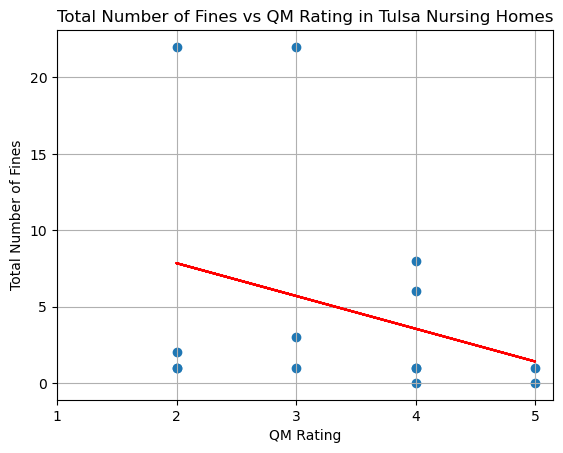

In [103]:
#Evaluating the overall rating of each nursing home and the number of fines to see if there is a relationship.
x_value_rating = tulsa_data['QM Rating'] 
y_value_fines = tulsa_data['Number of Fines']

cor_coefficent, p_value = st.pearsonr(x_value_rating, y_value_fines)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value_rating, y_value_fines)
plt.plot(x_value_rating, (slope*x_value_rating + intercept), color="red")
plt.scatter(x_value_rating, y_value_fines)
plt.xlabel('QM Rating')
plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0])
plt.ylabel('Total Number of Fines')
plt.title('Total Number of Fines vs QM Rating in Tulsa Nursing Homes')
plt.grid()

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This is a negative, weak correlation. The QM rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.")

<Axes: xlabel='QM Rating'>

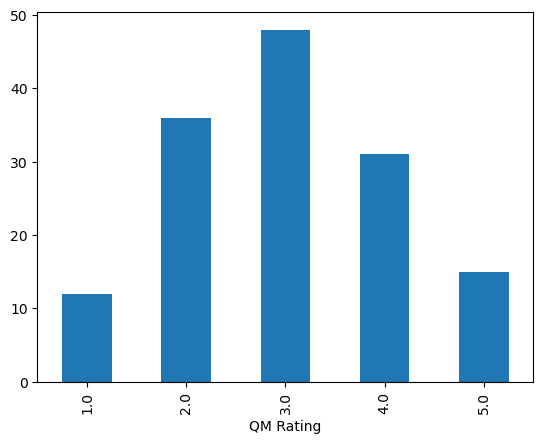

In [106]:
x_value_rating = ok_reduced_data.groupby(['QM Rating']).count()['Number of Fines']
y_value_fines = ok_reduced_data['Number of Fines']

# cor_coefficent, p_value = st.pearsonr(x_value_rating, y_value_fines)

# #linear regression
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value_rating, y_value_fines)
# plt.plot.(x_value_rating, (slope*x_value_rating + intercept), color="red")
x_value_rating.plot.bar()
# plt.xlabel('Overall Rating')
# plt.ylabel('Total Number of Fines')
# plt.title('Total Number of Fines vs QM Rating in Oklahoma Nursing Homes')

# historgram?
# print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a weak, negative correlation. The overall rating is affected negatively based on the total number of fines. This can be seen by the downward sloping linear regression.")

### Looking into citations of the two nursing homes with the most fines. 

In [21]:
citation_data = pd.read_csv("NH_HealthCitations_Jun2023.csv")

C:\Users\morga\AppData\Local\Temp\ipykernel_20808\2576749746.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  citation_data = pd.read_csv("NH_HealthCitations_Jun2023.csv")


In [22]:
#Pulling out the Oklahoma data only
ok_citations = citation_data[citation_data['State'] == 'OK']

In [23]:
# Cleaning and data wrangling
ok_clean_citations = ok_citations.dropna()
ok_clean_citations = ok_clean_citations.reset_index()

In [24]:
# Pulling out the data for the 2 nursing homes with the highest number of fines in Tulsa, OK.
tulsa_citations = ok_clean_citations[ok_clean_citations['City/Town'] == 'TULSA']
emerald_citations = tulsa_citations[tulsa_citations['Provider Name'] == 'EMERALD CARE CENTER TULSA']
south_hills_citations = tulsa_citations[tulsa_citations['Provider Name'] == 'SOUTHERN HILLS REHABILITATION CENTER']
highest_fine_citations = pd.merge(emerald_citations, south_hills_citations, how='outer')
highest_fine_citations

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Survey Date,Survey Type,Deficiency Prefix,...,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Citation under IDR,Citation under IIDR,Location,Processing Date
0,268697,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,2022-06-30,Health,F,...,"Deficient, Provider has date of correction",2022-08-04,1,N,Y,N,N,N,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
1,268698,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,2022-06-30,Health,F,...,"Deficient, Provider has date of correction",2022-08-04,1,N,Y,N,N,N,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
2,268699,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,2022-06-30,Health,F,...,"Deficient, Provider has date of correction",2022-08-04,1,N,Y,N,N,N,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
3,268700,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,2022-06-30,Health,F,...,"Deficient, Provider has date of correction",2022-08-04,1,N,Y,N,N,N,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
4,268701,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,2022-02-22,Health,F,...,"Deficient, Provider has date of correction",2022-04-07,1,Y,N,N,N,N,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,269655,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,74135,2019-03-05,Health,F,...,"Deficient, Provider has date of correction",2019-03-30,3,Y,N,N,N,N,"5170 SOUTH VANDALIA,TULSA,OK,74135",2023-06-01
81,269656,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,74135,2019-03-05,Health,F,...,"Deficient, Provider has date of correction",2019-03-30,3,Y,N,N,N,N,"5170 SOUTH VANDALIA,TULSA,OK,74135",2023-06-01
82,269657,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,74135,2019-03-05,Health,F,...,"Deficient, Provider has date of correction",2019-03-30,3,Y,N,N,N,N,"5170 SOUTH VANDALIA,TULSA,OK,74135",2023-06-01
83,269658,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,74135,2019-03-05,Health,F,...,"Deficient, Provider has date of correction",2019-03-30,3,Y,N,N,N,N,"5170 SOUTH VANDALIA,TULSA,OK,74135",2023-06-01


In [25]:
#highest_fine_citations.columns

In [26]:
number_citations = highest_fine_citations.groupby('Provider Name')['index'].count()

In [27]:
emerald_complaint = emerald_citations[emerald_citations['Complaint Deficiency'] == 'Y']['Provider Name'].count()
emerald_standard = emerald_citations[emerald_citations['Standard Deficiency'] == 'Y']['Provider Name'].count()
emerald_infection = emerald_citations[emerald_citations['Infection Control Inspection Deficiency'] == 'Y']['Provider Name'].count()
southern_h_complaint = south_hills_citations[south_hills_citations['Complaint Deficiency'] == 'Y']['Provider Name'].count()
southern_h_standard = south_hills_citations[south_hills_citations['Standard Deficiency'] == 'Y']['Provider Name'].count()
southern_h_infection = south_hills_citations[south_hills_citations['Infection Control Inspection Deficiency'] == 'Y']['Provider Name'].count()

In [40]:
# Create a DataFrame that lists the number and type of citation
data = {'Emerald Care Center Tulsa':[emerald_complaint, emerald_standard, emerald_infection],
        'Southern Hills Rehabilitation Center':[southern_h_complaint, southern_h_standard, southern_h_infection]}
index_names = ['Number of Complaint Citations', 'Number of Standard Citations', 'Number of Infection Control Inspection Citations']

type_of_cit = pd.DataFrame(data=data, index = index_names)

# Display results
type_of_cit

,Emerald Care Center Tulsa,Southern Hills Rehabilitation Center
Number of Complaint Citations,17,12
Number of Standard Citations,27,33
Number of Infection Control Inspection Citations,8,7


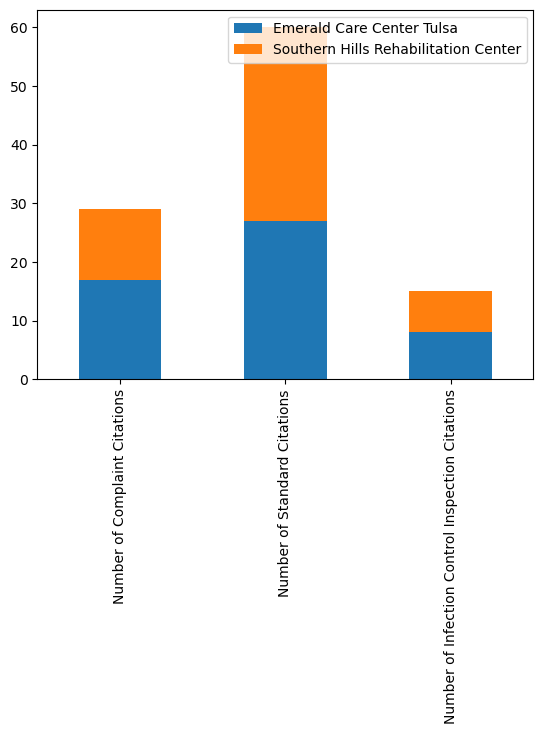

In [85]:
# x_diff = ['Emerald Care Center', 'Southern Hills Rehab']
# y1 = [(type_of_cit["Emerald Care Center Tulsa"][0]), (type_of_cit["Emerald Care Center Tulsa"][1]), (type_of_cit["Emerald Care Center Tulsa"][2]), (type_of_cit["Emerald Care Center Tulsa"][3])]
# y1 = [(type_of_cit["Southern Hills Rehabilitation Center"][0]), (type_of_cit["Southern Hills Rehabilitation Center"][1]), (type_of_cit["Southern Hills Rehabilitation Center"][2]), (type_of_cit["Southern Hills Rehabilitation Center"][3])]

type_of_cit.plot(kind='bar', stacked=True)
plt.show()

<Axes: >

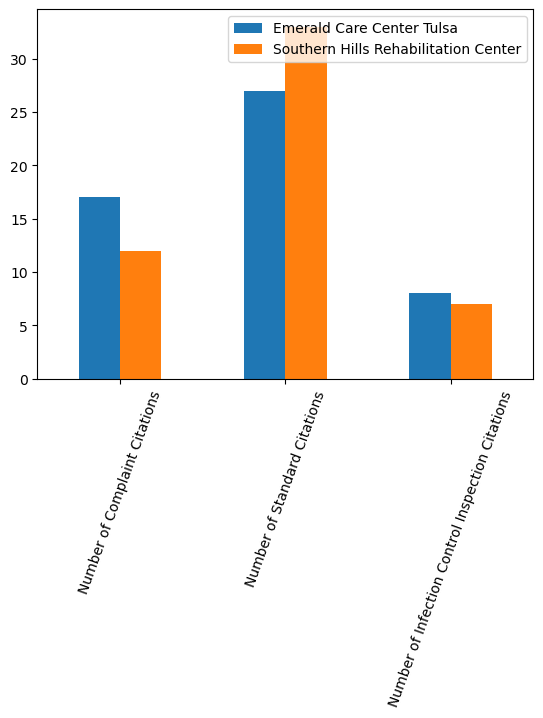

In [48]:
type_of_cit.plot.bar(rot = 70)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (4,).

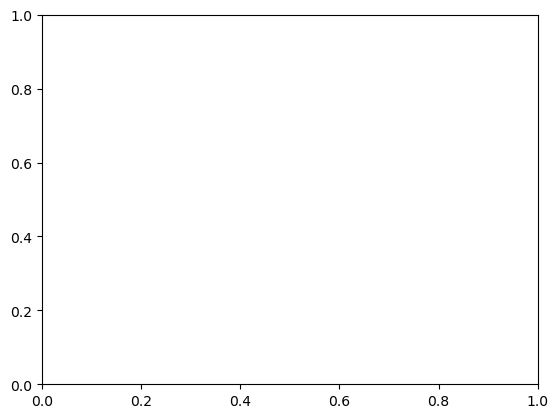

In [111]:
fig, ax = plt.subplots()
x_cit = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y1 = [number_citations[1], southern_h_complaint, southern_h_standard, southern_h_infection]
y2 = [number_citations[0], emerald_complaint, emerald_standard, emerald_infection]
plt.bar(x_cit, y1, label = 'Southern Hills Rehab Center')
plt.bar(x_cit, y2, label = 'Emerald Care Center')